# GAN Model 

In this notebook, we will attempt to create a DCGAN in order to generate movie posters of specific genres. 



In [41]:
from models.GANModel import GANModel 
# from GenreDataset import GenreDataset 
import numpy as np
import glob
import tensorflow as tf
from PIL import Image
from GenreDataset import GenreDataset
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, lets inspect some of the posters we are looking at. Here are some posters for the "Comedy" genre. 

In [43]:
def show_images(X):
    fig = plt.figure() 
    rows, columns = 1, X.shape[-1]
    fig = plt.figure()
    for i in range(1, rows*columns+1):
        fig.add_subplot(rows, columns, i)
        image = X[i-1]
        plt.imshow(image)
        plt.axis('off')

In [44]:
def get_session():
    config = tf.ConfigProto() 
    config.gpu_options.allow_growth = True 
    session = tf.Session(config=config) 
    return session

In [55]:
dataset = GenreDataset("Comedy", 100)

(3463, 64, 64, 3)


<Figure size 432x288 with 0 Axes>

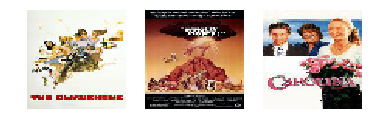

In [56]:
show_images(dataset.X[:5])

# Training a Model

We will now try to make a GAN using the comedy genre. 

(100, 8192)
(100, 4, 4, 512)
(100, 4, 4, 512)
(100, 8, 8, 256)
(100, 16, 16, 128)
(100, 32, 32, 64)
(100, 64, 64, 3)
(?, 64, 64, 3)
(?, 32, 32, 64)
(?, 16, 16, 128)
(?, 8, 8, 256)
(?, 4, 4, 512)
(?, 8192)
(?, 1)
(100, 64, 64, 3)
(100, 32, 32, 64)
(100, 16, 16, 128)
(100, 8, 8, 256)
(100, 4, 4, 512)
(100, 8192)
(100, 1)
Epoch #0 out of 5: 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

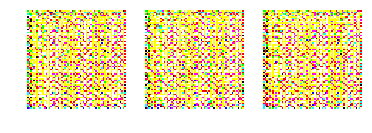


35/35 [==============================] - 479s - D Loss: 1.0933 - G Loss: 0.6802    
Epoch: 0, D: 1.019, G:0.6896
Epoch #1 out of 5: 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

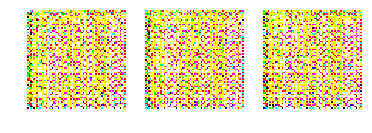


18/35 [==============>...............] - ETA: 232s - D Loss: 1.0117 - G Loss: 0.6915

KeyboardInterrupt: 

In [58]:
model = GANModel("Comedy", 100)
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
#     sess.run(tf.local_variables_initializer())
    model.fit(sess, dataset)

In [ ]:
agi 1546
sta 2318
str 3864